### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('real_estate_data.csv', sep = '\t')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.info() # узнали общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

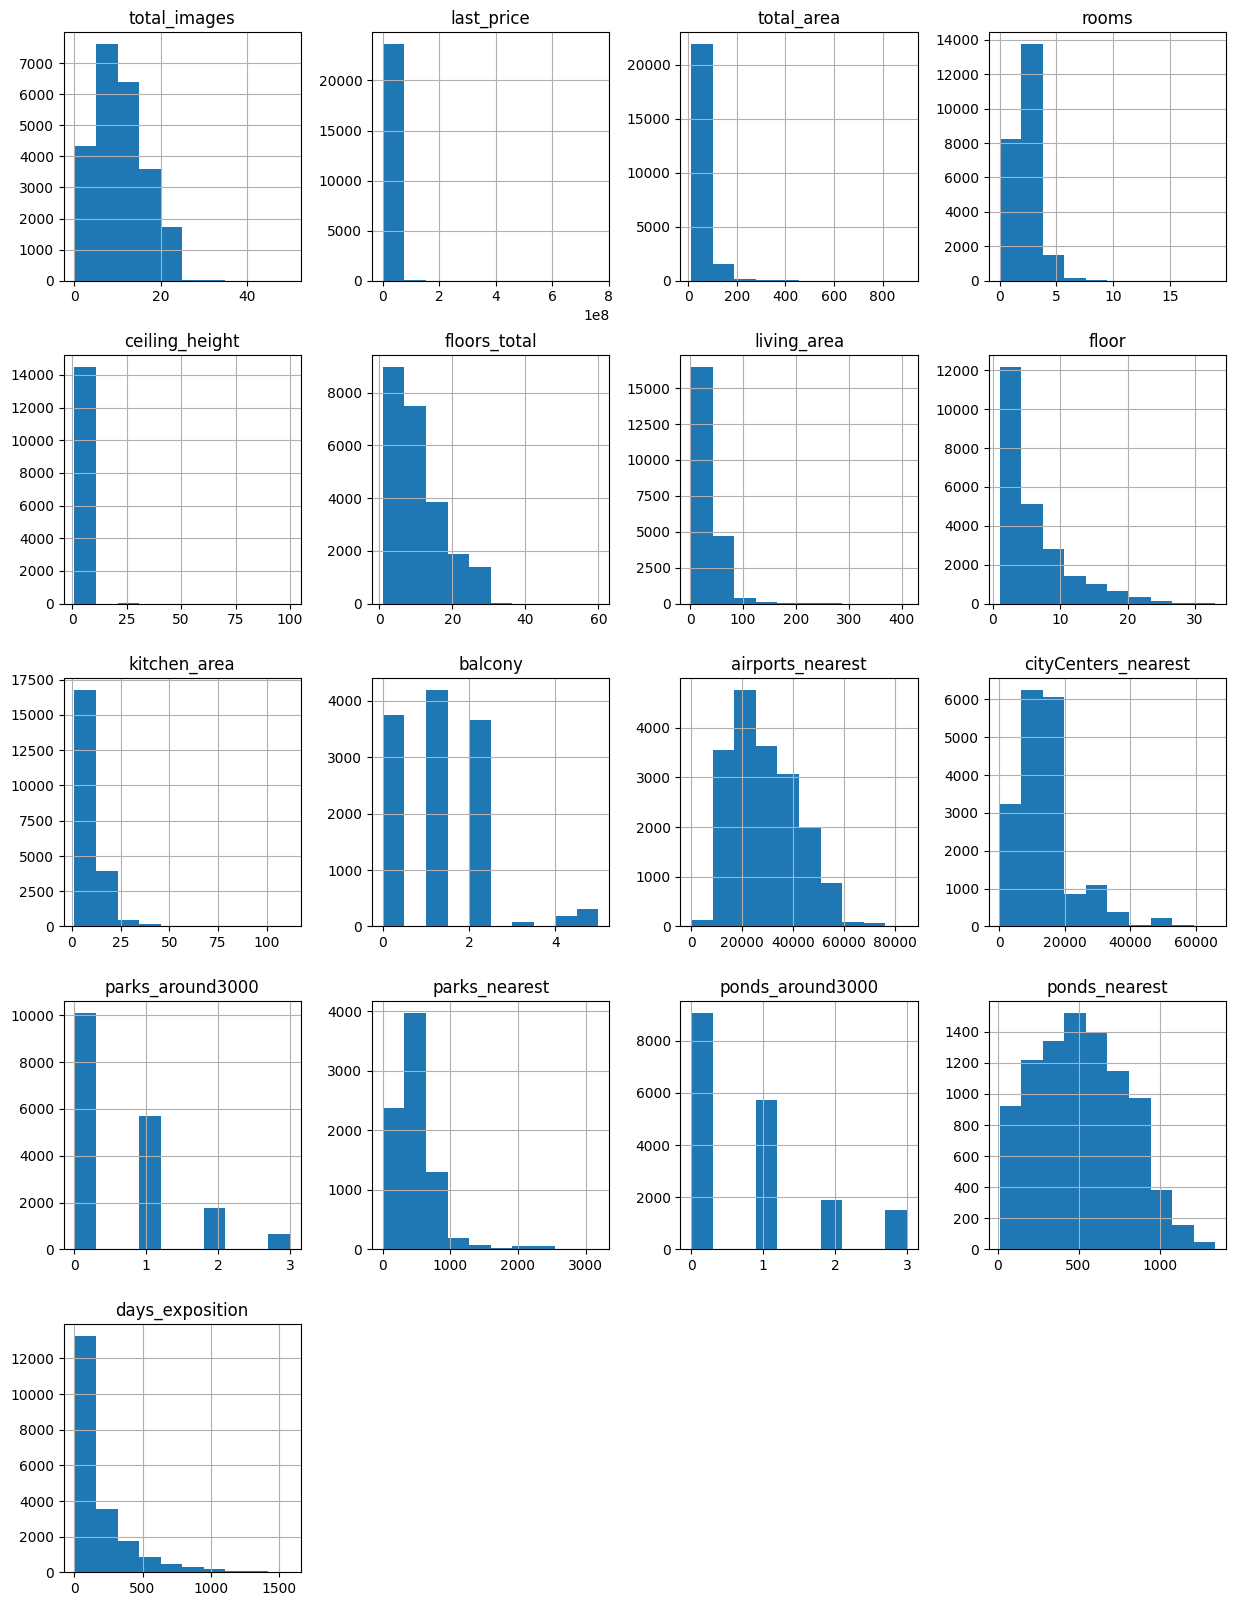

In [6]:
data.hist(figsize=(15, 20)) # построили общую гистограмму для всех числовых столбцов таблицы
plt.show()

### Предобработка данных

#### Найдем и изучим пропущенные значения в столбцах

In [7]:
data.isna().sum() # узнали количство пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Из полученных данных выше видно, что имеются пропуски в таких стобцах как ceiling_height(высота потолков (м)), floors_total(всего этажей в доме), living_area(жилая площадь в квадратных метрах (м²)), is_apartment (апартаменты (булев тип)), kitchen_area(площадь кухни в квадратных метрах (м²)), balcony(число балконов), locality_name(название населённого пункта), airports_nearest(расстояние до ближайшего аэропорта в метрах (м)), cityCenters_nearest(расстояние до центра города (м)), parks_around3000(число парков в радиусе 3 км), parks_nearest(расстояние до ближайшего парка (м)), ponds_around3000(число водоёмов в радиусе 3 км), ponds_nearest(расстояние до ближайшего водоёма (м)), days_exposition(сколько дней было размещено объявление (от публикации до снятия)). В таких столбцах как: airports_nearest(расстояние до ближайшего аэропорта в метрах (м)), cityCenters_nearest(расстояние до центра города (м)), parks_nearest(расстояние до ближайшего парка (м)), ponds_nearest(расстояние до ближайшего водоёма (м)) пропуски скорее всего вызваны картографическими ошибками. В столбцах ceiling_height(высота потолков (м)),floors_total(всего этажей в доме), living_area(жилая площадь в квадратных метрах (м²)), is_apartment (апартаменты (булев тип)), kitchen_area(площадь кухни в квадратных метрах (м²)), locality_name(название населённого пункта) пропуски могли возникнуть из-за того, что сам продавец не вносил данные. В столбце days_exposition(сколько дней было размещено объявление (от публикации до снятия)) пропуски скорее всего могли образоваться из-за того, что объявление до сих пор актуально. В таких столбцах как parks_around3000(число парков в радиусе 3 км), ponds_around3000(число водоёмов в радиусе 3 км), пропуски могли появиться как отсутствием таковых показателей так и картографическими ошибками. В таком столбце как balcony(число балконов) пропуски могли появиться как отсутствием таковых показателей так и сам продавец мог не внести данные.

В таких столбцах как: locality_name(название населённого пункта), airports_nearest(расстояние до ближайшего аэропорта в метрах (м)), cityCenters_nearest(расстояние до центра города (м)), parks_nearest(расстояние до ближайшего парка (м)), ponds_nearest(расстояние до ближайшего водоёма (м)) заменить пропуски конкретными результатами мы не можем. 
В столбце ceiling_height(высота потолков (м)) пропущенные значения мы можем заменить медиальным значениями высоты потолков, при этом отбросив вбросы.

In [8]:
data['ceiling_height'].sort_values().unique() # узнали какие есть значения высоты потолков.

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Из данных выше, можно предположить, что, возможно, в значениях больше 10 произошла ошибка с точкой, она ушла в сторону на 1 знак. Для того, чтобы убрать ошибки в значениях больше 10 разделим эти значения на 10.

In [9]:
for i in data['ceiling_height']:
    if i >= 9:
        data['ceiling_height'] = data['ceiling_height'].replace({i:i/10})

In [10]:
data['ceiling_height'].sort_values().unique() # Проверили, изменились ли значения

array([ 1.  ,  1.03,  1.2 ,  1.4 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,
        2.3 ,  2.34,  2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,
        2.51,  2.52,  2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,
        2.6 ,  2.61,  2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,
        2.69,  2.7 ,  2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,
        2.78,  2.79,  2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,
        2.87,  2.88,  2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,
        2.96,  2.97,  2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,
        3.05,  3.06,  3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,
        3.14,  3.15,  3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,
        3.24,  3.25,  3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,
        3.33,  3.34,  3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,
        3.43,  3.44,  3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,
        3.52,  3.53,  3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,
        3.62,  3.63,

In [11]:
data['ceiling_height'].describe() # Узнали ориентировочные значения высоты потолков. 

count    14504.000000
mean         2.728100
std          0.299855
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

Из полученных данных можно исключить те, которые являются выбросами. Диапазон исключения можно определить таким способом: Q3-Q1 = IQR, Q3 + IQR*1.5  - максимальный размах, Q1 - IQR*1.5  -  минимальный размах. IQR = 2.800000 - 2.510000 = 0.290000. Максимальный размах = 2.800000 + 0.290000*1.5 = 3.235000. Минимальный размах = 2.510000 - 0.290000*1.5 = 2.075000

In [12]:
data_ceiling_median = data.query('2.075000 <=ceiling_height <= 3.235000') # Создали переменную, в которой лежат значения высоты потолка без выбросов 

In [13]:
data['ceiling_height'] = data['ceiling_height'].fillna(data_ceiling_median['ceiling_height'].median()) # Заменили пропуски в датафрейме на медиальные значения без выбросов 

In [14]:
data['ceiling_height'].sort_values().unique() # Проверили, ушли ли пропуски

array([ 1.  ,  1.03,  1.2 ,  1.4 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,
        2.3 ,  2.34,  2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,
        2.51,  2.52,  2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,
        2.6 ,  2.61,  2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,
        2.69,  2.7 ,  2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,
        2.78,  2.79,  2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,
        2.87,  2.88,  2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,
        2.96,  2.97,  2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,
        3.05,  3.06,  3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,
        3.14,  3.15,  3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,
        3.24,  3.25,  3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,
        3.33,  3.34,  3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,
        3.43,  3.44,  3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,
        3.52,  3.53,  3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,
        3.62,  3.63,

In [15]:
data.isna().sum() # Проверили, убраны ли пропуски в столбце ceiling_height

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Далее с пропусками в столбце floors_total. Данные пропуски составляют очень маленькую часть от общего количества данных, а именно около 0.36% от общей выборки. Мы можем удалить строки с пропущенными данными в данных строках. 

In [16]:
data = data.dropna(subset=['floors_total']).reset_index(drop=True)

In [17]:
data.isna().sum() # Проверили, удалены ли строки.

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

Пропуски в столбцах living_area и kitchen_area лучше не заполнять. Если пропуски в данных столбцах заполнять соотношениями их средних значений к общей площади недвижимости могут возникнуть аномалии, в которых сумма площади кухни и жилой площади будет больше общей площади недвижимости.

В столбце is_apartment пропуски вызваны скорее всего человеческим фактором. Для продажи апартаментов указание их статуса для продавца важный аспект, в то время как для продажи обычной недвижимости это не так важно. Отсюда можно сделать вывод, что скорее всего на месте пропусков находится недвижимость, которая не является апартаментами. Можно заменить пропуски значениями False.

In [18]:
data['is_apartment'] = data['is_apartment'].fillna(False) # Заменили пропуски на False

In [19]:
data.isna().sum() # Проверили наличие пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

В столбце balcony пропуски скорее всего вызваны отсутствием их как таковых. Пропуски в данном столбце можно заменить значением 0.

In [20]:
data['balcony'] = data['balcony'].fillna(0)

In [21]:
data.isna().sum() # Проверили наличие пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

В стобце locality_name заменить пропуски мы ничем не можем. Данных пропусков очень мало и без данной информации крайне не информативны. От них лучше избавиться. 

In [22]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

In [23]:
data.isna().sum() # Проверили наличие пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

В столбцах parks_around3000 и ponds_around3000 скорее всего пропуски связаны с тем, что ни парков ни водоемов на данном расстоянии нет. Данные пропуски можно заменить значением 0. 

In [24]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [25]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [26]:
data.isna().sum() # Проверили наличие пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

В строке days_exposition пропуски вызваны скорее всего тем, что объявления о продаже недвижимости актуальны да данный момент. Данные пропуски лучше оставить.

#### Рассмотрим типы данных в каждом столбце

In [27]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Теперь изменим тип данных в некоторых стобцах. Начнем с first_day_exposition. Работать с измененным типом данных будет проще и с ним можно будет выполнять в дальнейшей различные операции.

In [28]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # Преобразовали данные

In [29]:
data.info() # Проверили изменение типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

Далее переведем значения столбцов floors_total, balcony, parks_around3000, ponds_around3000 в числовые, так как в дальнейшем для удобства с нимим так будет легче работать и данные воспринимаются лучше. 

In [30]:
data['floors_total'] = data['floors_total'].astype('int')

In [31]:
data['balcony'] = data['balcony'].astype('int')

In [32]:
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [33]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

Значения в столбце days_exposition перевести в числовые не сможем, так как там остались пропуски. 

In [34]:
data.info() # Проверили изменение типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

#### Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты. 

In [35]:
data['locality_name'].unique() # Просмотрели уникальные значения

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [36]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex = True) # Убрали значения с буквой 'ё'

In [37]:
data['locality_name'].unique() # Просмотрели изменения

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

In [38]:
data['locality_name'] = data['locality_name'].replace(['коттеджный ','станции ','садовое товарищество ', 'городской поселок ', 'деревня ', 'поселок ', 'городского типа ', 'село '], '', regex = True) # Оставляем только названия населенных пунктов, для устранения неявных дубликатов

In [39]:
data['locality_name'].unique() # Проверили устранение неявных дубликатов.

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

#### Найдем и устраним редкие и выбивающиеся значения

Найдем аномальные значения в столбце с общей площадью квартир. 

In [40]:
data['total_area'].describe() # Узнали ориентировочные значения обшей площади.

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Из полученных данных можно исключить те, которые являются выбросами. Диапазон исключения можно определить таким способом: Q3-Q1 = IQR, Q3 + IQR1.5 - максимальный размах, Q1 - IQR1.5 - минимальный размах. IQR = 69.7 - 40.0 = 29.7. Максимальный размах = 69.7 + 29.7*1.5 = 114.25. Минимальный размах = 40.0 - 29.7*1.5 = -4.55. Проверим теперь, много ли квартир, чья общая площадь превышает 114.25 

In [41]:
new_data = data.query('total_area <= 114.25') # Отбросили аномальные значения

In [42]:
new_data.shape[0] / data.shape[0] # Узнали, в каком соотношении были отброшены результаты

0.947422024188415

Найдем аномальные значения в столбце с количством комнат.

In [43]:
data['rooms'].describe() # Узнали ориентировочные значения количества комнат.

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Из полученных данных можно исключить те, которые являются выбросами. Диапазон исключения можно определить таким способом: Q3-Q1 = IQR, Q3 + IQR1.5 - максимальный размах, Q1 - IQR1.5 - минимальный размах. IQR = 3 - 1 = 2. Максимальный размах = 3 + 2*1.5 = 6. Минимальный размах = 1 - 2*1.5 = -2. Проверим теперь, много ли квартир, где количество комнат больше 6.

In [44]:
new_data = new_data.query('rooms <= 6') # Отбросили аномальные значения

In [45]:
new_data.shape[0] / data.shape[0] # Узнали, в каком соотношении были отброшены результаты

0.9473795883725865

Найдем аномальные значения в столбце со стоимостью.

In [46]:
data['last_price'].describe() # Узнали ориентировочные значения количества комнат.

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Из полученных данных можно исключить те, которые являются выбросами. Диапазон исключения можно определить таким способом: Q3-Q1 = IQR, Q3 + IQR1.5 - максимальный размах, Q1 - IQR1.5 - минимальный размах. IQR = 6 790 000 - 3 400 000 = 3 390 000. Максимальный размах = 6 790 000 + 3 390 000*1.5 = 11 875 000. Минимальный размах = 3 400 000 - 3 390 000*1.5 = -1 685 000. Проверим теперь, много ли квартир, где цена больше 11 875 000.

In [47]:
new_data = new_data.query('last_price <= 11875000') # Отбросили аномальные значения

In [48]:
new_data.shape[0] / data.shape[0] # Узнали, в каком соотношении были отброшены результаты

0.9054954381497984

Общий объем отброшенных данных не более 10% и можно обойтись без них. 

In [49]:
data = new_data # Приравняем отброшенные данные датафрему с которым будем в дальнейшем работать

### Посчитаем и добавим в таблицу новые столбцы

Добавим столбец с ценой квадратного метра, назовем его price_square_meter

In [50]:
data['price_square_meter'] = (data['last_price']/data['total_area']).astype('int') # Создали столбец с ценой квадратного метра и перевели его для удобства в числовой тип данных

In [51]:
data.head() # Проверили результаты

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter
1,7,3350000.0,40.4,2018-12-04,1,2.64,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920
2,10,5196000.0,56.0,2015-08-20,2,2.64,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000
5,10,2890000.0,30.4,2018-09-10,1,2.64,12,14.4,5,False,False,False,9.1,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065
6,6,3700000.0,37.3,2017-11-02,1,2.64,26,10.6,6,False,False,False,14.4,1,Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195


Добавим столбец с днем недели публикации, назовем его day

In [52]:
data['day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday # Добавили столбец с днем недели

In [53]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month 

In [54]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [55]:
data.head() # Проверили результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day,month,year
1,7,3350000.0,40.4,2018-12-04,1,2.64,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.64,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,2.64,12,14.4,5,False,False,False,9.1,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065,0,9,2018
6,6,3700000.0,37.3,2017-11-02,1,2.64,26,10.6,6,False,False,False,14.4,1,Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195,3,11,2017


Функцией выведем тип этажа квартиры (значения — «‎первый», «последний», «другой») и добавим эти значения в столбец floor_type

In [56]:
def categorize_floor(row):# создайте функцию categorize_floor()
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == floors_total:
        return 'последний'
    if floor == 1:
        return 'первый'
    return 'другой'
     

In [57]:
data['floor_type'] = data.apply(categorize_floor, axis=1)# применим функцию методом apply()

In [58]:
data.head() # Проверили результаты

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day,month,year,floor_type
1,7,3350000.0,40.4,2018-12-04,1,2.64,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.64,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,3,8,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018,другой
5,10,2890000.0,30.4,2018-09-10,1,2.64,12,14.4,5,False,False,False,9.1,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065,0,9,2018,другой
6,6,3700000.0,37.3,2017-11-02,1,2.64,26,10.6,6,False,False,False,14.4,1,Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195,3,11,2017,другой


Далее создадим столбец distance_center_km с расстояние до центра города в километрах. Для этого разделим данные в cityCenters_nearest на 1000. Далее уберем пропущенные значения поставив вместо них выдуманное чило 555,  и приведем данные значения в столбце к целому числу.

In [59]:
data['distance_center_km'] = round(data['cityCenters_nearest']/1000) # Создали столбец с нужными значениями

In [60]:
data['distance_center_km'] = data['distance_center_km'].fillna(555) # Поставили затычку вместо отсутствующих значений

In [61]:
data['distance_center_km'] = data['distance_center_km'].astype('int') # Поменяли тип данных

Теперь у нас имеется столбец с необходимми данными. При необходимости воспользоваться ими мы можем отбросить значения 555, которые сами написали.

### Проведем исследовательский анализ данных

#### Изучим параметры объектов.

1. Общая площадь. Постоим гистограмму по данному пераметру.

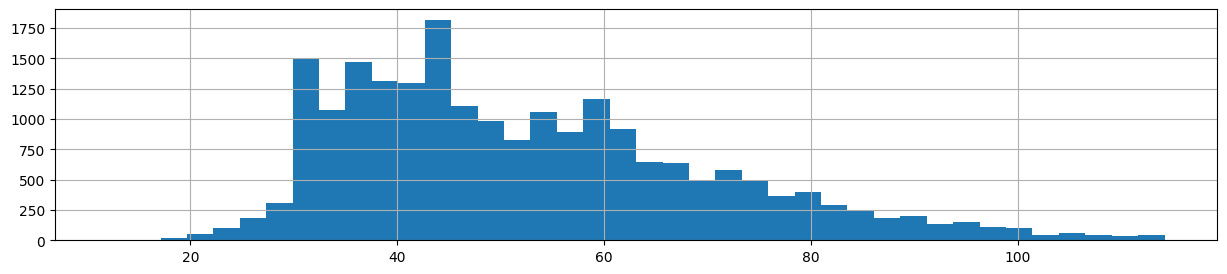

In [62]:
data['total_area'].hist(bins=40, figsize=(15, 3));

Как видим из гистограммы, основную массу объявлений составляет недвижимость с площадью прмерно от 30 кв.м. до 62.5 кв.м.

2. Жилая площадь. Постоим гистограмму по данному пераметру.

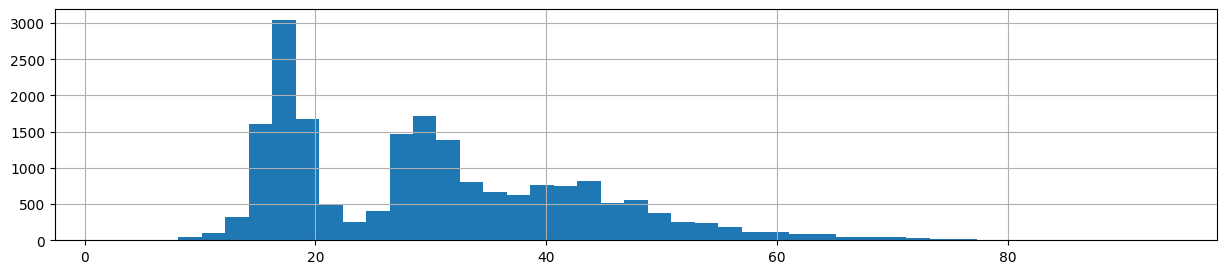

In [63]:
data['living_area'].hist(bins=45, figsize=(15, 3));

Как видим из гистограммы, основную массу объявлений составляет недвижимость с жилой площадью прмерно от 14 кв.м. до 20 кв.м. Так же имеется значительное количество квартир с пложадью квартир от 26 кв.м. до 32 кв.м.

3. Площадь кухни. Постоим гистограмму по данному пераметру.

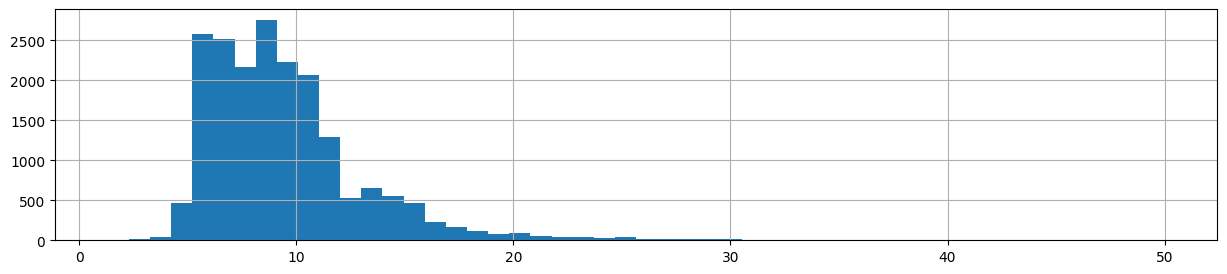

In [64]:
data['kitchen_area'].hist(bins=50, figsize=(15, 3));

Как видим из гистограммы, основную массу объявлений составляет недвижимость с кухней площадью прмерно от 5 кв.м. до 11 кв.м.

4. Цена объекта. Постоим гистограмму по данному пераметру.

In [65]:
data_last_price = data.loc[:,'last_price']/1000000 # Введем новую переменную, для удобства разделим значения data['last_price'] на 1000000

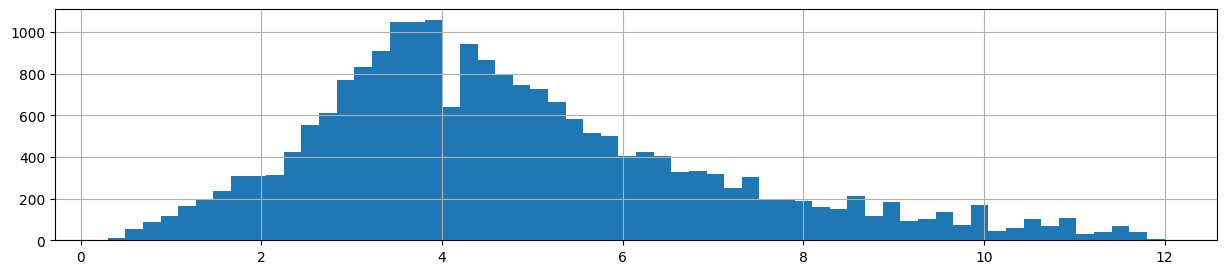

In [66]:
data_last_price.hist(bins=60, figsize=(15, 3), range=(0.3, 12)); # Посторим гистограмму

Как видим из гистограммы, основную массу объявлений составляет недвижимость в диапазоне стоимостью от 2 800 000 до 5 600 000 рублей. Причем главный пик цен приходит на  стоимость от 3 400 000 до 4 000 000 рублей

5. Количество комнат. Постоим гистограмму по данному параметру.

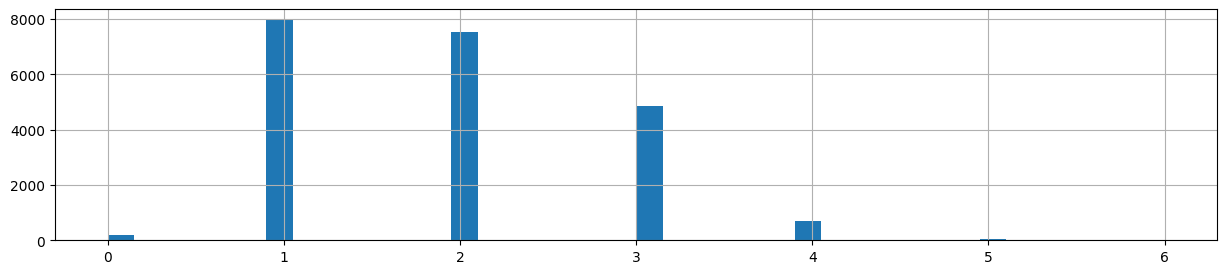

In [67]:
data['rooms'].hist(bins=40, figsize=(15, 3));

Как видим из гистограммы, основную массу объявлений составляет недвижимость с одной и двумя комнатами.

6. Высота потолков. Постоим гистограмму по данному параметру.

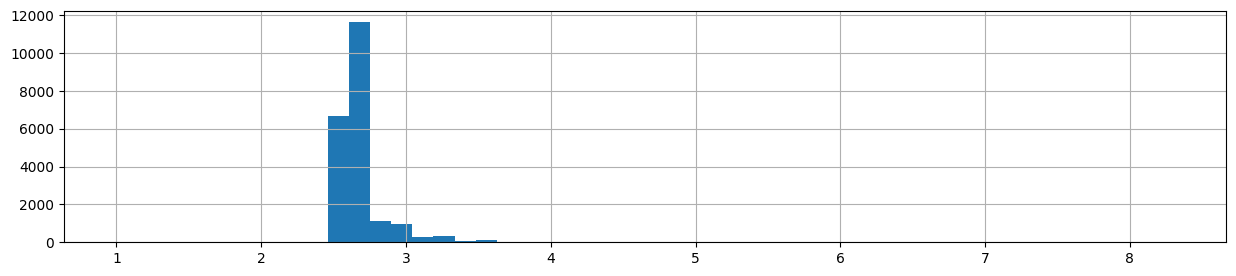

In [68]:
data['ceiling_height'].hist(bins=50, figsize=(15, 3));

Как видим из гистограммы, основную массу объявлений составляет недвижимость с высотой потолков от 2.45 до 2.9 метра.

7. Этаж квартиры. Постоим гистограмму по данному параметру.

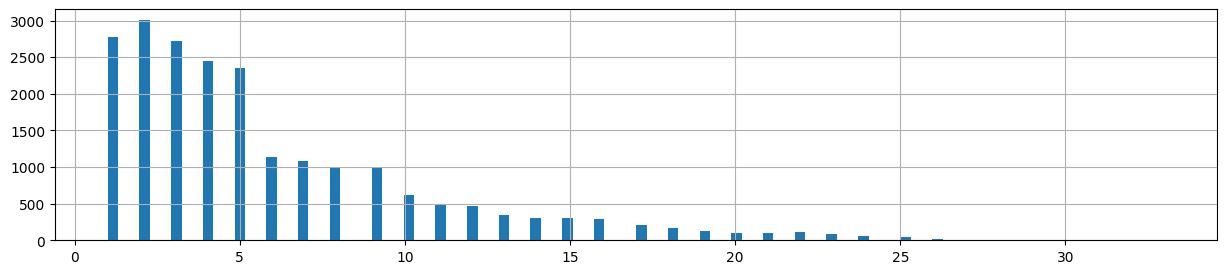

In [69]:
data['floor'].hist(bins=100, figsize=(15, 3));

Как видим из гистограммы, основную массу объявлений составляет недвижимость находящаяся с 1 по 5 этажи.

8. Тип этажа квартиры. Постоим гистограмму по данному параметру.

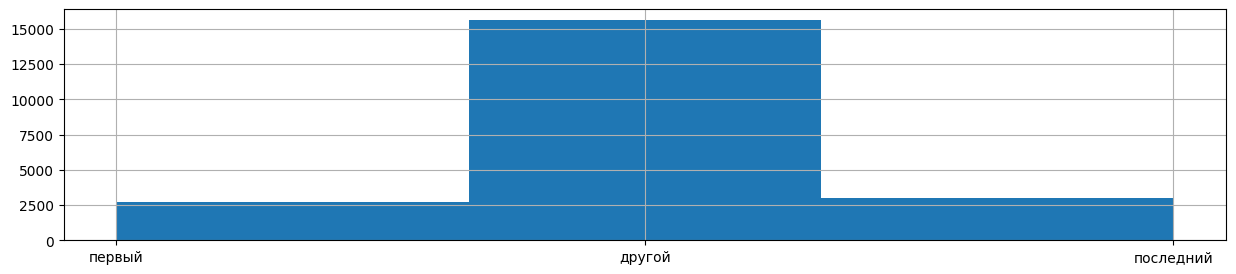

In [70]:
data['floor_type'].hist(bins=3, figsize=(15, 3));

Как видим из гистограммы, основную массу объявлений составляет недвижимость которая распалагается не на 1 ни на последнем этаже.

9. Общее количество этажей в доме. Постоим гистограмму по данному параметру.

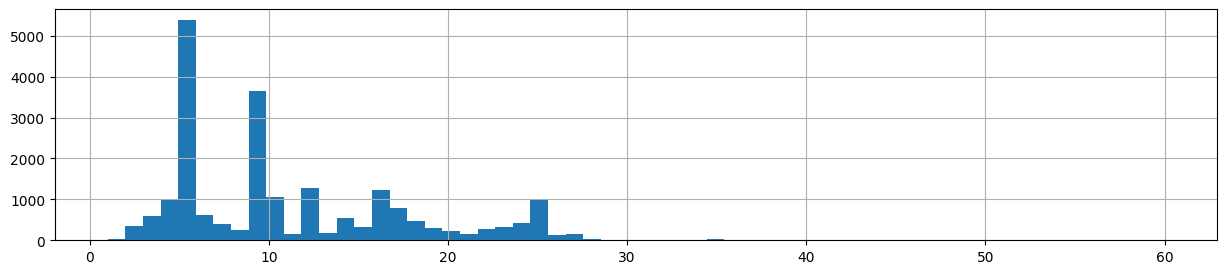

In [71]:
data['floors_total'].hist(bins=60, figsize=(15, 3));

Как видим из гистограммы, основную массу объявлений составляет недвижимость которая распалагается в домах с 6 этажами и 10 этажами.

10. Расстояние до центра города в метрах. Постоим гистограмму по данному параметру.

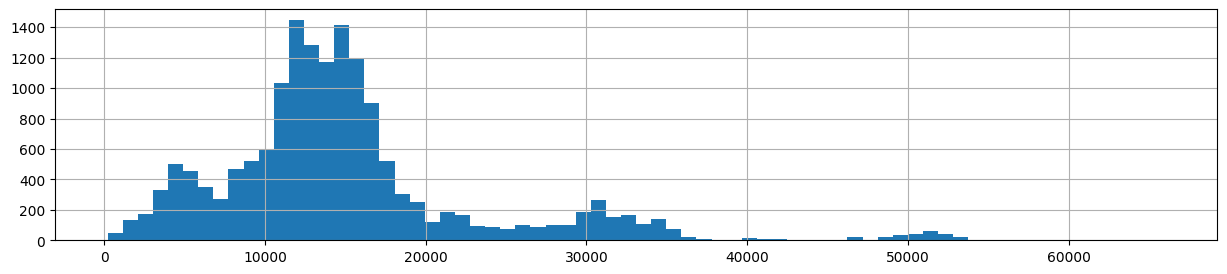

In [72]:
data['cityCenters_nearest'].hist(bins=70, figsize=(15, 3));

Как видим из гистограммы, основную массу объявлений составляет недвижимость которая распалагается на расстоянии до центра примерно от 10 500 до 17 500.

11. Расстояние до ближайшего аэропорта. Постоим гистограмму по данному параметру.

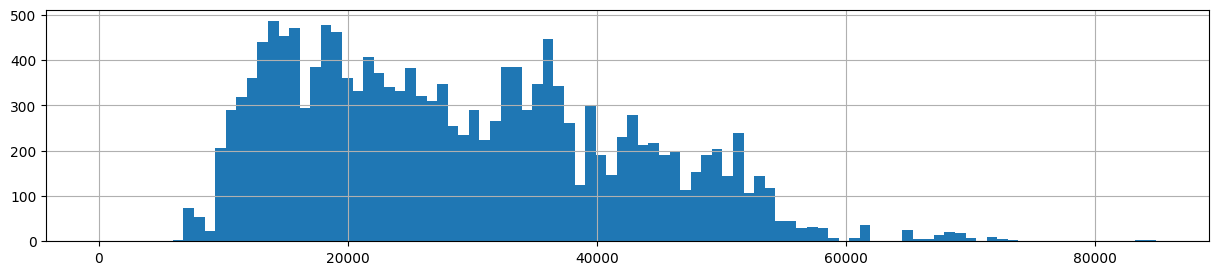

In [73]:
data['airports_nearest'].hist(bins=100, figsize=(15, 3));

Как видим из гистограммы, нет ярко выраженного пика по дальности от аэропорта.Основную массу объявлений составляет недвижимость, которая распалагается на расстоянии до аэропорта примерно от 10 000 до 40 000 метров.

12. Расстояние до ближайшего парка. Постоим гистограмму по данному параметру.

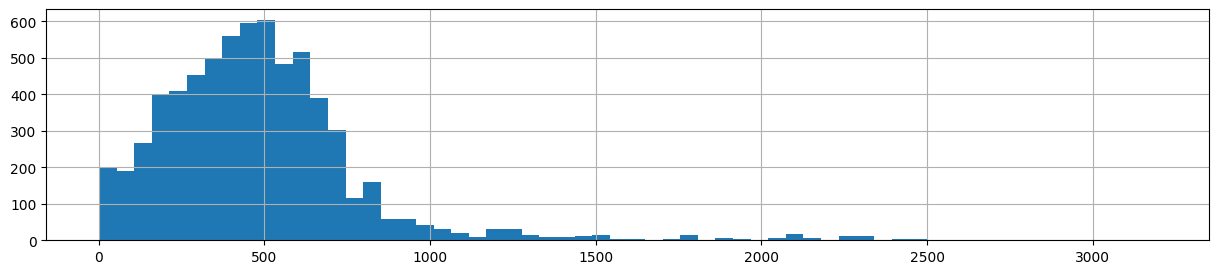

In [74]:
data['parks_nearest'].hist(bins=60, figsize=(15, 3));

Как видим из гистограммы, нет ярко выраженного пика по дальности от парка.Основную массу объявлений составляет недвижимость, которая распалагается на расстоянии до парка примерно от 150 до 675 метров.

13. День и месяц публикации объявления. Постоим гистограмму по данному параметру.

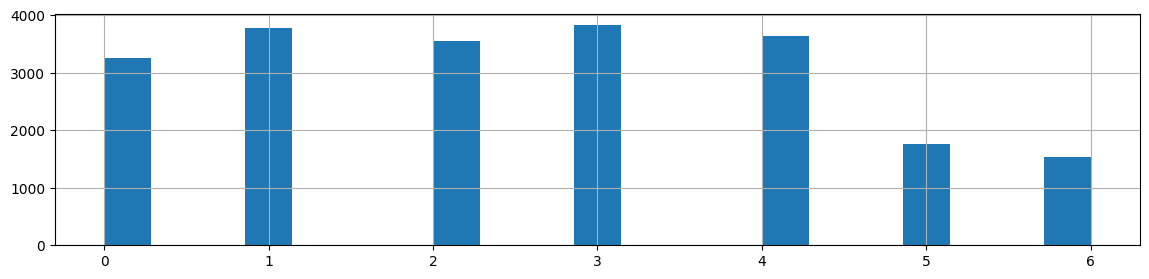

In [75]:
data['day'].hist(bins=21, figsize=(14, 3)); # Построим гистограмму по дням недели

0 - понедельник; 1 - вторник; 2 - среда; 3 - четверг; 4 - пятница; 5 - суббота; 6 - воскресенье.

Как видно из гистограммы, основная масса объявлений публикуются в будние дни.

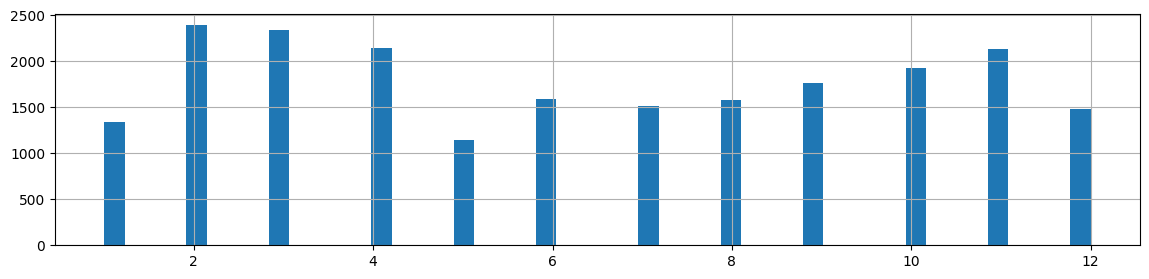

In [76]:
data['month'].hist(bins=48, figsize=(14, 3)); # Построим гистограмму публикаций по месяцам

Как видно из гистограммы, наибольший всплеск публикации объявлений приходятся на месяцы: февраль, март, апрель, ноябрь.

#### Изучим, как быстро продавались квартиры.

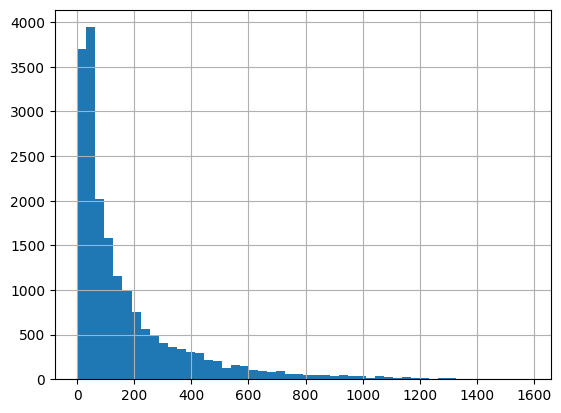

In [77]:
data['days_exposition'].hist(bins=50);

Как видим из гистограммы, есть четко враженный период продаж. Большая масса продаж осужествлялась в период до 200 дней. Причем самый большой пик покупок приходится на период от 1 до 70 дней. 

Расчитаем среднее и медиальное значения времени продаж.

In [78]:
data['days_exposition'].mean() # Среднее значение

171.92707666026052

In [79]:
data['days_exposition'].median() # Медиальное значение

91.0

Расчитаем теперь, какие продажи можно считать быстрыми, а какие — необычно долгими.

In [80]:
data['days_exposition'].describe()

count    18732.000000
mean       171.927077
std        210.131375
min          1.000000
25%         43.000000
50%         91.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64

Из полученных данных можно узнать результаты, которые являются необычно быстрыми и необычно долгими. Диапазон исключения можно определить таким способом: Q3-Q1 = IQR, Q3 + IQR1.5 - максимальный размах, Q1 - IQR1.5 - минимальный размах. IQR = 217 - 43 = 174. Максимальный размах = 217 + 174*1.5 = 478. Минимальный размах = 43 - 186*1.5 = -218. Данные значения говорят о том, что необычно быстрого времени продажи нет. Покупка в 1 день размещения объявления является нормой. В то же время продажа дольше 478 дней является необычно долгой. 

#### Узнаем, какие факторы больше всего влияют на общую (полную) стоимость объекта

In [81]:
data_1 =  data.loc[:,['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']] # Cоздали новую переменную, в которую входят нужные нам значения
data_1.head()

,last_price,total_area,living_area,kitchen_area,rooms
1,3350000.0,40.4,18.6,11.0,1
2,5196000.0,56.0,34.3,8.3,2
4,10000000.0,100.0,32.0,41.0,2
5,2890000.0,30.4,14.4,9.1,1
6,3700000.0,37.3,10.6,14.4,1


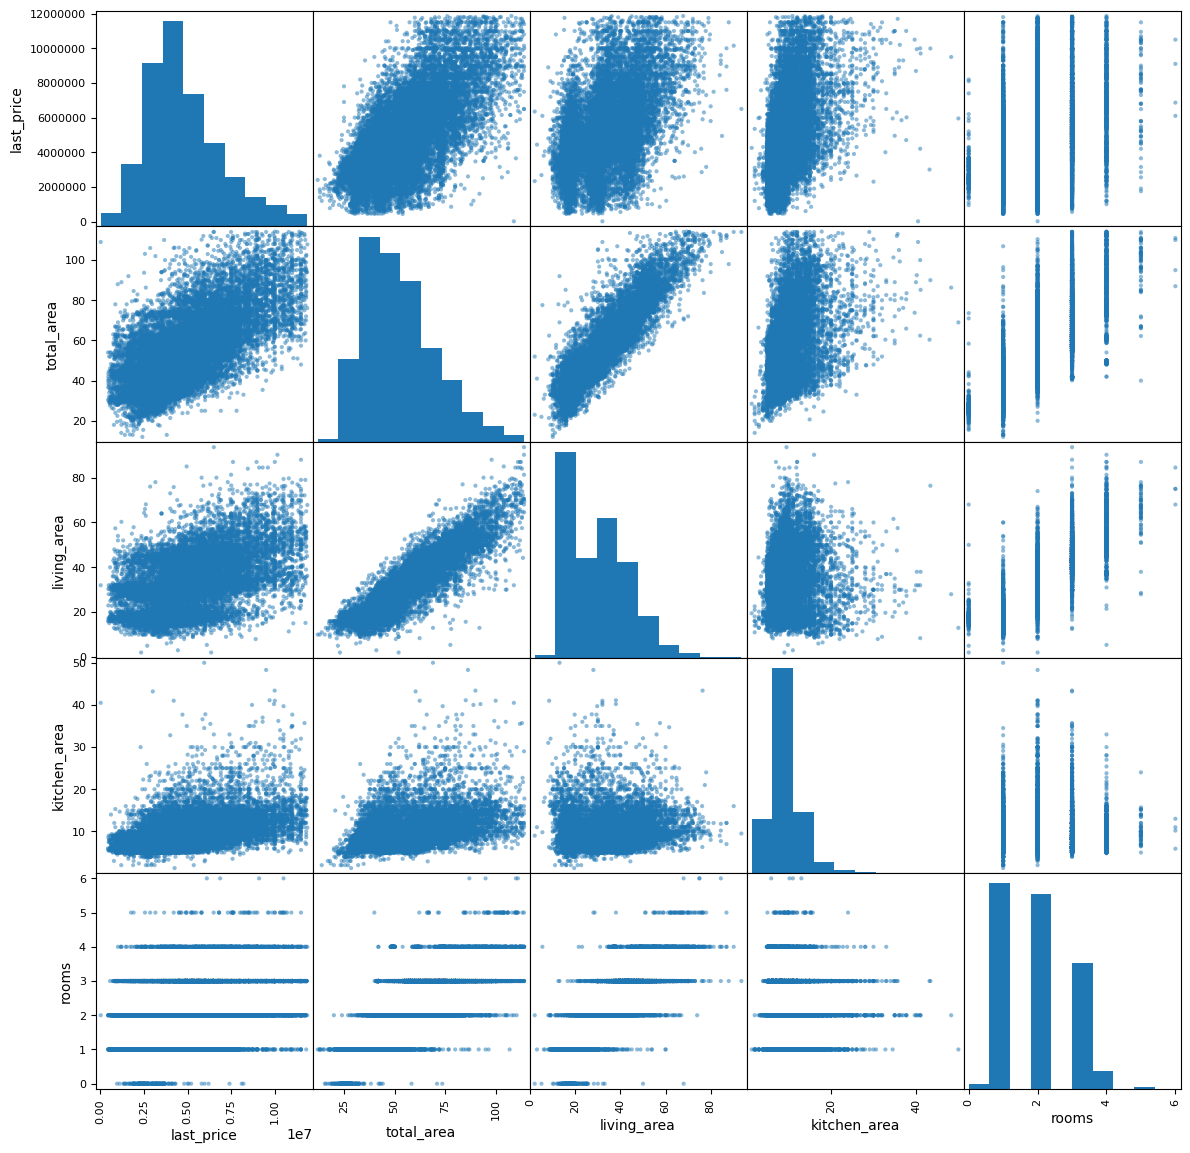

In [82]:
pd.plotting.scatter_matrix(data_1, figsize=(14, 14)) #Вывели зависимость цены от всех величин.
plt.show()

In [83]:
data_1.corr() # Для более точного понимания зависимости цены от данных величин выведем матрицу корреляции.

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.694052,0.564275,0.474975,0.431782
total_area,0.694052,1.000000,0.907125,0.411314,0.803538
living_area,0.564275,0.907125,1.000000,0.113612,0.892064
kitchen_area,0.474975,0.411314,0.113612,1.000000,0.017386
rooms,0.431782,0.803538,0.892064,0.017386,1.000000


Как видно из полученных данных, больше всего на цену влияет общая площадь, далее идет жилая площадь, потом площадь кухни, потом количество комнат.

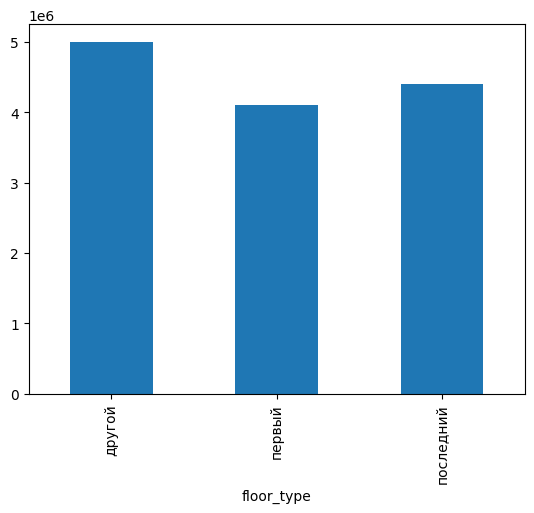

In [84]:
data.groupby('floor_type')['last_price'].mean().plot.bar(); # Построим график, отобращающий средние значения цен на надвижимость в зависимости от типа этажа

In [85]:
data.groupby('floor_type')['last_price'].mean() # Выведем точные средние значения

floor_type
другой       4.998644e+06
первый       4.096946e+06
последний    4.404690e+06
Name: last_price, dtype: float64

Из полученных данных можно заметить, что наибольшая средняя цена соответсвует недвижимости расположенной не на первом и не на последнем этаже. Далее идет недвижимость расположенная на последнем этаже и замыкает недвижимость на первом этаже.

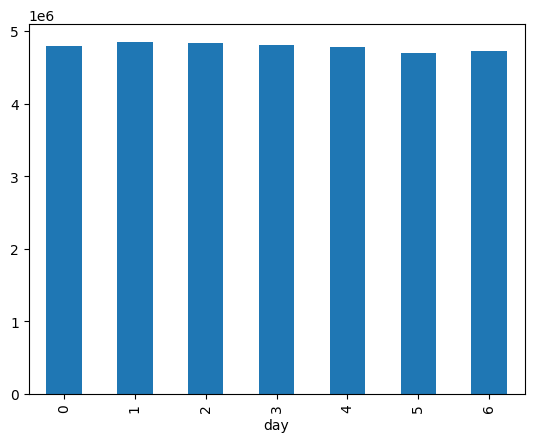

In [86]:
data.groupby('day')['last_price'].mean().plot.bar(); # Построим график, отобращающий средние значения цен на надвижимость в зависимости от дня недели

In [87]:
data.groupby('day')['last_price'].mean() # Выведем точные средние значения

day
0    4.800456e+06
1    4.851580e+06
2    4.830276e+06
3    4.814835e+06
4    4.780433e+06
5    4.702914e+06
6    4.719764e+06
Name: last_price, dtype: float64

Судя по данным день недели сильно не сказывается на стоимость недвижимости

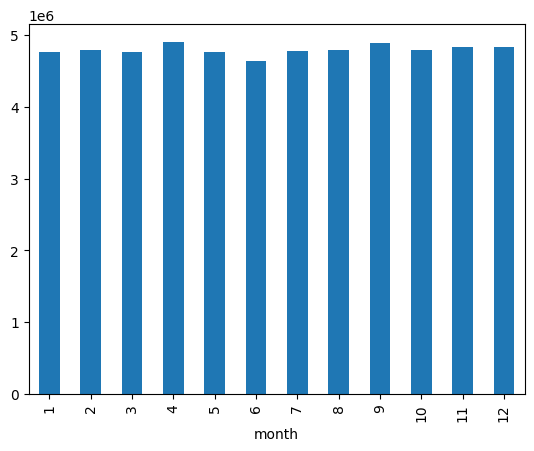

In [88]:
data.groupby('month')['last_price'].mean().plot.bar(); # Построим график, отобращающий средние значения цен на надвижимость в зависимости от месяца

In [89]:
data.groupby('month')['last_price'].mean(); # Выведем точные средние значения

Судя по данным месяц сильно не сказывается на стоимость недвижимости, хоть и влияние месяца чуть выше, чем у дня недели

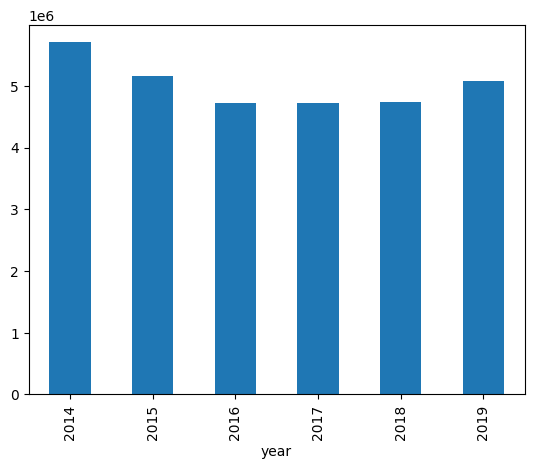

In [90]:
data.groupby('year')['last_price'].mean().plot.bar(); # Построим график, отобращающий средние значения цен на надвижимость в зависимости от года

In [91]:
data.groupby('year')['last_price'].mean() # Выведем точные средние значения

year
2014    5.703125e+06
2015    5.153859e+06
2016    4.723940e+06
2017    4.729236e+06
2018    4.742503e+06
2019    5.082402e+06
Name: last_price, dtype: float64

Судя по данным, от года публикации явно прослеживается зависимость. На графике видно, что наибольшаея цена на недвижимость зафиксирована в 2014 году, после чего началось ее снижение и только в 2019 году цена ощутимо повысилась.

Из полученных данных в сторону увеличения цены влияет увеличение таких характеристик как: общая площадь, жилая площадь,  площадь кухни, количество комнат. Так же на цену влияет расположение квартиры в зависимости от типа этажа, а именно: самые дорогие расположены между первым и последним этажем. Дешевле идут квартиры расположенные на последнем этаже и замыкают в стоимости квартиры на первом этаже. Такие характеристика как день недели и месяц публикации сильно не влияют на цену. Год публикации в свою очередь сильно повлиял на цену квартир, возможно повлиял какой-то экономический фактор.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [92]:
data['price_per_square'] = round(data['last_price']/data['total_area']) #Добавим столбец с стоимостью сквадратного метра 

In [93]:
data_locality_name = data.pivot_table(index='locality_name', values='price_per_square', aggfunc=['count', 'mean']).reset_index()# Ввели новую переменную, в которой отображены количество ценовых предложений и средняя цена за квадратный метр в определенном населенном пункте 

In [94]:
data_locality_name.sort_values(by=('count','price_per_square'), ascending=False).head(10) # Отсортировали по количесву ценовых предложений и вывели 10 первых результатов из списка

,locality_name,count,mean
,,price_per_square,price_per_square
221,Санкт-Петербург,13546,105686.249963
144,Мурино,586,86041.114334
105,Кудрово,468,95087.002137
294,Шушары,436,78578.082569
34,Всеволожск,394,67222.434010
200,Пушкин,336,100462.062500
88,Колпино,335,75221.868657
168,Парголово,326,90332.236196
42,Гатчина,303,68664.000000


Из полученных выше данных можно заметить, что из 10 населенных пунктов с самыми большими предложеними по продажам недвижимости самый высокой показатель средней стоимости квадратного метра жилья в Санкт-Петербурге. Самый низкий показатель средней стоимости квадратного метра жилья в Выборге.

#### Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра.

In [95]:
data.loc[data['distance_center_km'] == 555, 'distance_center_km'] = 'Nan' #Для начала заменим имеющееся у нас значение, которое было внесено для удобства на реальное.

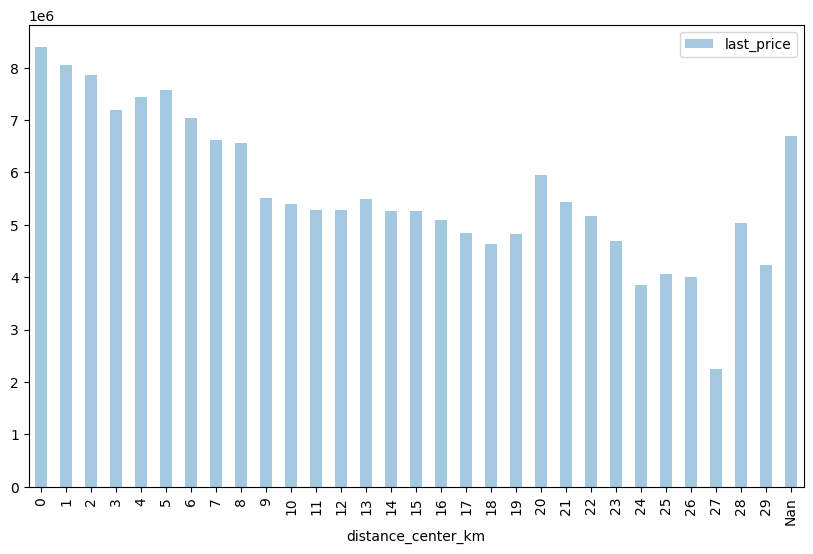

In [96]:
spb_pivot = (
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='distance_center_km', values='last_price', aggfunc='mean').reset_index()
) # Расчитаем среднюю цену недвижимости по километрам
spb_pivot.plot(x='distance_center_km', y='last_price', kind='bar', alpha=0.4, figsize=(10,6))
plt.show() # Выведем график со средними ценами по километрам            

In [97]:
spb_pivot # Выведем полученные результаты в числовых значениях

,distance_center_km,last_price
0,0,8.398000e+06
1,1,8.054663e+06
2,2,7.855586e+06
3,3,7.194664e+06
4,4,7.436492e+06
5,5,7.577308e+06
6,6,7.043400e+06
7,7,6.617217e+06
8,8,6.565267e+06
9,9,5.505304e+06


Из полученных результатов выше, мажно сделать вывод о зависимости цены от расстояния до центра города. При удалении от центра наблюдается падение средненй цены на недвижимость. 

Судя по графику, центр города заканчивается скорее всего на 10 километре. На 10 километре наблюдается резкое падение цены на недвижимость после чего цены на графики долгое время остаются однородными.

### Общий вывод

В данном проекте была проделана следующая работа:
Выполнена предобработка данных, а именно: найдены и изучены пропущенные значения в столбцах, рассмотрены типы данных в каждом столбце, изучены уникальные значения в столбце с названиями и устранены неявные дубликаты, найдены и устранены редкие и выбивающиеся значения. 
Добавлены в таблицу новые столбцы со следующими параметрами: цена одного квадратного метра, день недели публикации объявления (0 — понедельник, 1 — вторник и так далее), месяц публикации объявления, год публикации объявления, тип этажа квартиры (значения — «первый», «последний», «другой»), расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
Проведен исследовательский анализ данных: изучены параметры объектов; изучено, как быстро продавались квартиры; факторы, которые больше всего влияют на общую (полную) стоимость объекта; посчитаны средние цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений; выделены квартиры в Санкт-Петербурге и вычислены средние цены квартир в зависимости от дальности от центра города.


Благодаря данным анализа нам удалось установить: основную массу объявлений составляет недвижимость: с площадью примерно от 30 кв.м. до 62.5 кв.м.; с жилой площадью примерно от 14 кв.м. до 20 кв.м., но при этом имеется значительное количество квартир с площадью квартир от 26 кв.м. до 32 кв.м.; с кухней площадью примерно от 5 кв.м. до 11 кв.м.; с основной диапазоном стоимости от 2 800 000 до 5 600 000 рублей, где главный пик цен приходит на стоимость от 3 400 000 до 4 000 000 рублей; с высотой потолков от 2.45 до 2.9 метра; которая располагается в домах с 6 этажами и 10 этажами; которая располагается на расстоянии до центра примерно от 10 500 до 17 500; которая не имеет ярко выраженного пика по дальности от аэропорта основная часть при этом распалагается на расстоянии до аэропорта примерно от 10 000 до 40 000 метров; которая не имеет ярко выраженного пика по дальности от парка и основную массу объявлений составляет недвижимость, которая распалагается на расстоянии до парка примерно от 150 до 675 метров; которую опубликовали в будние дни; наибольший всплеск публикаций приходятся на месяцы: февраль, март, апрель, ноябрь; где большая масса продаж осуществлялась в период до 200 дней, причем самый большой пик покупок приходится на период от 1 до 70 дней.
Среднее время продажи недвижимости 172 дня и медиальное 91. Необычно быстрого времени продажи нет. Покупка в 1 день размещения объявления является нормой. В то же время продажа дольше 478 дней является необычно долгой.
Из полученных данных в сторону увеличения цены влияет увеличение таких характеристик как: общая площадь, жилая площадь, площадь кухни, количество комнат. Так же на цену влияет расположение квартиры в зависимости от типа этажа, а именно: самые дорогие расположены между первым и последним этажом. Дешевле идут квартиры, расположенные на последнем этаже и замыкают в стоимости квартиры на первом этаже. Такие характеристика как день недели и месяц публикации сильно не влияют на цену. Год публикации в свою очередь сильно повлиял на цену квартир, возможно повлиял какой-то экономический фактор. 
Из 10 населенных пунктов с самыми большими предложеними по продажам недвижимости самый высокой показатель средней стоимости квадратного метра жилья в Санкт-Петербурге. Самый низкий показатель средней стоимости квадратного метра жилья оказался в Выборге.
Существует четкая зависимость цены от расстояния до центра города в Санкт-Петербурге. При удалении от центра наблюдается падение средней цены на недвижимость.
Скорее всего на 10 километре заканчивается зона центра города в Санкт-Петербурге. 
